In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [2]:
# Hyper Parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [3]:
# Toy Dataset
x_train = np.array([[3.3],[4.5],[5.5],[6.71],[6.93],[4.168],[9.779],
                    [6.183],[7.59],[2.167],[7.042],[10.791],[5.313],
                    [7.997],[3.1]],dtype=np.float32)
y_train = np.array([[1.7],[2.76],[2.09],[3.19],[1.694],[1.573],[3.366],
                   [2.596],[2.53],[1.221],[2.827],[3.465],[1.65],[2.904],
                   [1.3]],dtype=np.float32)

In [4]:
y_train

array([[ 1.70000005],
       [ 2.75999999],
       [ 2.08999991],
       [ 3.19000006],
       [ 1.69400001],
       [ 1.57299995],
       [ 3.36599994],
       [ 2.59599996],
       [ 2.52999997],
       [ 1.22099996],
       [ 2.8269999 ],
       [ 3.46499991],
       [ 1.64999998],
       [ 2.90400004],
       [ 1.29999995]], dtype=float32)

In [5]:
# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(input_size,output_size)
    def forward(self,x):
        out = self.linear(x)
        return out
model = LinearRegression(input_size,output_size)

In [6]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [7]:
# Train the Model
for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    targets = Variable(torch.from_numpy(y_train))
    
    # Forward + Backward + Optimize
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs,targets)
    loss.backward()
    optimizer.step()
    
    if(epoch+1)%5==0:
        print('Epoch [%d/%d],Loss:%.4f'
             %(epoch+1,num_epochs,loss.data[0]))

Epoch [5/60],Loss:4.0259
Epoch [10/60],Loss:1.8701
Epoch [15/60],Loss:0.9976
Epoch [20/60],Loss:0.6442
Epoch [25/60],Loss:0.5009
Epoch [30/60],Loss:0.4425
Epoch [35/60],Loss:0.4186
Epoch [40/60],Loss:0.4085
Epoch [45/60],Loss:0.4041
Epoch [50/60],Loss:0.4019
Epoch [55/60],Loss:0.4007
Epoch [60/60],Loss:0.3999


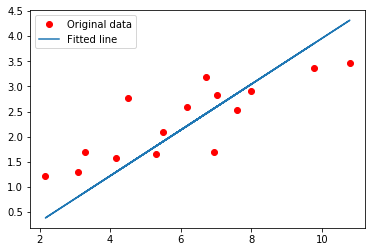

In [8]:
# plot the graph
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train,y_train,'ro',label='Original data')
plt.plot(x_train,predicted,label='Fitted line')
plt.legend()
plt.show()

In [9]:
torch.save(model.state_dict(),'../checkpoint/linear_regression.pkl')